In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
import os

import qgis
from qgis.gui import *
from qgis.core import *
from qgis.utils import plugins
from PyQt5.QtCore import *
from qgis.analysis import QgsNativeAlgorithms

sys.path.append(r'C:\OSGeo4W64\apps\qgis\python') #this is important for loading processing library
sys.path.append(r'C:\OSGeo4W64\apps\qgis\python\plugins') #this is important for loading processing library

In [3]:
QgsApplication.setPrefixPath(r'C:\OSGeo4W64\apps\qgis', True)
qgs = QgsApplication([], False)
qgs.initQgis()


C:\OSGEO4~1\apps\Python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
print(sys.path)

['C:\\Users\\user\\Desktop\\Projects\\qgis-vanguard', 'C:\\OSGEO4~1\\apps\\qgis\\python', 'c:\\osgeo4w64\\apps\\python37\\python37.zip', 'C:\\OSGEO4~1\\apps\\Python37\\DLLs', 'C:\\OSGEO4~1\\apps\\Python37\\lib', 'c:\\osgeo4w64\\apps\\python37', 'C:\\OSGEO4~1\\apps\\Python37', '', 'C:\\OSGEO4~1\\apps\\Python37\\lib\\site-packages', 'C:\\OSGEO4~1\\apps\\Python37\\lib\\site-packages\\win32', 'C:\\OSGEO4~1\\apps\\Python37\\lib\\site-packages\\win32\\lib', 'C:\\OSGEO4~1\\apps\\Python37\\lib\\site-packages\\Pythonwin', 'C:\\OSGEO4~1\\apps\\Python37\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\user\\.ipython', 'C:\\OSGeo4W64\\apps\\qgis\\python', 'C:\\OSGeo4W64\\apps\\qgis\\python\\plugins']


In [5]:
# import processing
from osgeo import ogr

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
plt.ion()

import processing
from processing.core.Processing import Processing
Processing.initialize()
QgsApplication.processingRegistry().addProvider(QgsNativeAlgorithms())
for alg in QgsApplication.processingRegistry().algorithms():
        print(alg.id(), "--->", alg.displayName())

3d:tessellate ---> Tessellate
gdal:aspect ---> Aspect
gdal:assignprojection ---> Assign projection
gdal:buffervectors ---> Buffer vectors
gdal:buildvirtualraster ---> Build virtual raster
gdal:buildvirtualvector ---> Build virtual vector
gdal:cliprasterbyextent ---> Clip raster by extent
gdal:cliprasterbymasklayer ---> Clip raster by mask layer
gdal:clipvectorbyextent ---> Clip vector by extent
gdal:clipvectorbypolygon ---> Clip vector by mask layer
gdal:colorrelief ---> Color relief
gdal:contour ---> Contour
gdal:contour_polygon ---> Contour Polygons
gdal:convertformat ---> Convert format
gdal:dissolve ---> Dissolve
gdal:executesql ---> Execute SQL
gdal:extractprojection ---> Extract projection
gdal:fillnodata ---> Fill nodata
gdal:gdal2tiles ---> gdal2tiles
gdal:gdal2xyz ---> gdal2xyz
gdal:gdalinfo ---> Raster information
gdal:gridaverage ---> Grid (Moving average)
gdal:griddatametrics ---> Grid (Data metrics)
gdal:gridinversedistance ---> Grid (Inverse distance to a power)
gdal:grid

In [6]:
os.getcwd()

'C:\\Users\\user\\Desktop\\Projects\\qgis-vanguard'

In [11]:
from PyQt5.QtGui import *
from PyQt5.QtWidgets import *

In [13]:
mb = QMessageBox()
mb.setText('Click OK to confirm')
mb.setStandardButtons(QMessageBox.Ok | QMessageBox.Cancel)
return_value = mb.exec()
if return_value == QMessageBox.Ok:
    print('You pressed OK')
elif return_value == QMessageBox.Cancel:
    print('You pressed Cancel')

You pressed OK


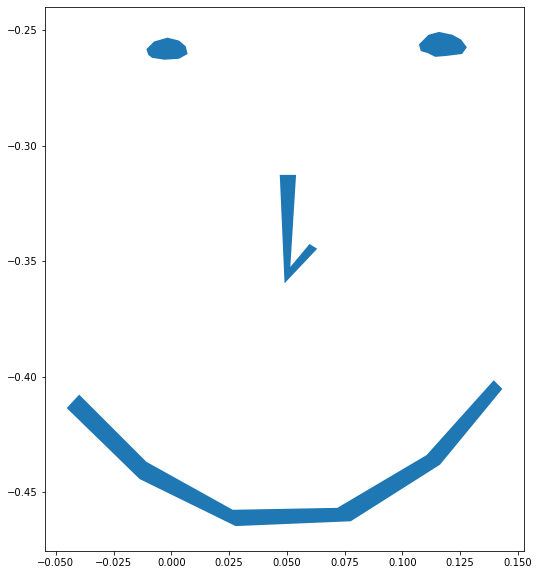

In [11]:
source = r"qgis-vanguard\Data\smile.geojson"
inputvector = QgsVectorLayer(source)
fig, ax = plt.subplots(figsize = (10,10))
gpd.read_file(source).plot(ax=ax);

In [12]:
processing.algorithmHelp("native:extractvertices")

Extract vertices (native:extractvertices)

This algorithm takes a line or polygon layer and generates a point layer with points representing the vertices in the input lines or polygons. The attributes associated to each point are the same ones associated to the line or polygon that the point belongs to.

Additional fields are added to the point indicating the vertex index (beginning at 0), the vertex’s part and its index within the part (as well as its ring for polygons), distance along original geometry and bisector angle of vertex for original geometry.


----------------
Input parameters
----------------

INPUT: Input layer

	Parameter type:	QgsProcessingParameterFeatureSource

	Accepted data types:
		- str: layer ID
		- str: layer name
		- str: layer source
		- QgsProcessingFeatureSourceDefinition
		- QgsProperty
		- QgsVectorLayer

OUTPUT: Vertices

	Parameter type:	QgsProcessingParameterFeatureSink

	Accepted data types:
		- str: destination vector file, e.g. 'd:/test.shp'
		- st

C:\OSGEO4~1\apps\Python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


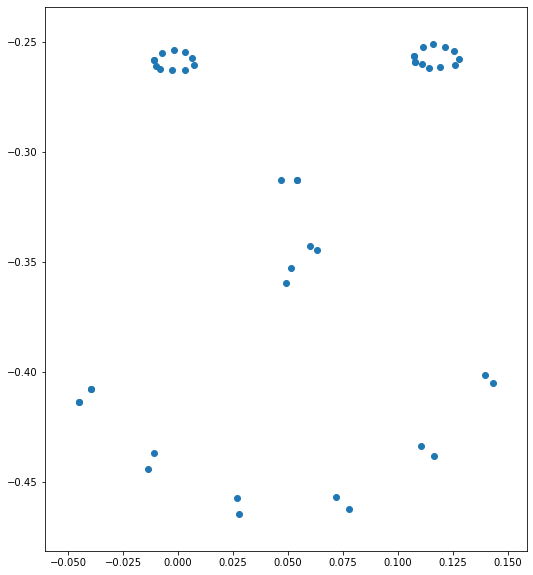

In [13]:
vertice_out = r"qgis-vanguard\Data\smile_vertices.geojson"
# just delete the output if exist
if os.path.exists(vertice_out):
    os.remove(vertice_out)
else:
    pass
params = {
    'INPUT': inputvector,
    'OUTPUT': vertice_out
}
feedback = QgsProcessingFeedback()
processing.run("native:extractvertices", params, feedback=feedback)
fig, ax = plt.subplots(figsize = (10,10))
gpd.read_file(vertice_out).plot(ax=ax);

In [14]:
qgs.exitQgis()
qgs.exit()

C:\OSGEO4~1\apps\Python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
